# analytical method for correction of AuNRs 

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
import seaborn as sns
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

## upload dataset

In [11]:
p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/input_data/SPP2023")

# all glass data
glass_data = pd.read_csv(Path(p, '090723_glass_training.csv'))
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['corrcoef'], axis=1)
glass_data['volume'] = np.pi*(glass_data['width']**2)*glass_data['length']/4 - np.pi*(glass_data['width']**3)/12

# all ITO data
ito_data = pd.read_csv(Path(p, '111623_ito_training.csv'))
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)

In [12]:
# Randomly sample 1000 rows from each dataframe
glass_data = glass_data.sample(n=1000, random_state=42)
ito_data = ito_data.sample(n=1000, random_state=42)

## latest analytical method as of 060424

In [ ]:
def analytical_method(glass_data, target_n):
    l_d = 0.37 * glass_data['volume']**(1/3)
    term1 = (glass_data['width'] + l_d) / (glass_data['width'] + 2*l_d)
    # term2 = l_d / (glass_data['width'] + 2*l_d)
    
    # Constants
    omega_p = 9  # plasma frequency in eV
    epsilon_inf = 9.84  # high-frequency dielectric constant
    n_glass = 1.52  # effective refractive index for glass substrate
    aspect_ratio = glass_data['ratio']  # given aspect ratio
    n_X = 1.975  # refractive index for unknown substrate

    # n_eff_glass = (n_glass + 1) / 2
    # n_eff_X = (n_X + 1) / 2

    alpha = term1
    n_med = 1.0
    n_eff_glass = alpha*n_med + n_glass*(1-alpha)
    n_eff_X = alpha*n_med + n_X*(1-alpha)

    # Depolarization factor L for the given aspect ratio
    L = (1 + aspect_ratio)**-1.6

    # Resonance energy for glass substrate
    E_res_glass = omega_p / np.sqrt(n_eff_glass**2 / L + epsilon_inf - n_eff_glass**2)

    # Resonance energy for unknown substrate
    E_res_X = omega_p / np.sqrt(n_eff_X**2 / L + epsilon_inf - n_eff_X**2)

    # Calculate the factor F
    F = E_res_X / E_res_glass

    print(E_res_glass.shape, E_res_X.shape, F.shape)

In [13]:
# new definition of effective refractive index
l_d = 0.37 * glass_data['volume']**(1/3)
term1 = (glass_data['width'] + l_d) / (glass_data['width'] + 2*l_d)
term2 = l_d / (glass_data['width'] + 2*l_d)

In [14]:
# Constants
omega_p = 9  # plasma frequency in eV
epsilon_inf = 9.84  # high-frequency dielectric constant
n_glass = 1.52  # effective refractive index for glass substrate
aspect_ratio = glass_data['ratio']  # given aspect ratio
n_X = 1.975  # refractive index for unknown substrate

# n_eff_glass = (n_glass + 1) / 2
# n_eff_X = (n_X + 1) / 2

alpha = term1
n_med = 1.0
n_eff_glass = alpha*n_med + n_glass*(1-alpha)
n_eff_X = alpha*n_med + n_X*(1-alpha)

# Depolarization factor L for the given aspect ratio
L = (1 + aspect_ratio)**-1.6

# Resonance energy for glass substrate
E_res_glass = omega_p / np.sqrt(n_eff_glass**2 / L + epsilon_inf - n_eff_glass**2)

# Resonance energy for unknown substrate
E_res_X = omega_p / np.sqrt(n_eff_X**2 / L + epsilon_inf - n_eff_X**2)

# Calculate the factor F
F = E_res_X / E_res_glass

print(E_res_glass.shape, E_res_X.shape, F.shape)

(1000,) (1000,) (1000,)


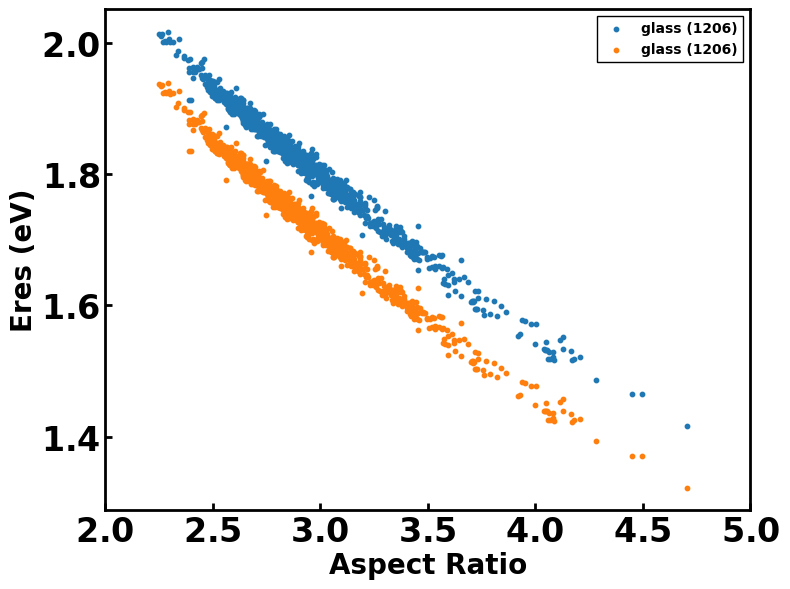

In [6]:
# Eres vs AR ITO and glass
plt.scatter(glass_data['ratio'], glass_data['eres'], s=10, label=f'glass ({glass_data.shape[0]})')
plt.scatter(glass_data['ratio'], glass_data['eres']*F, s=10, label=f'glass ({glass_data.shape[0]})')
# plt.scatter(ito_data['ratio'], ito_data['eres'], s=10, label=f'ITO ({ito_data.shape[0]})')

plt.xlabel('Aspect Ratio')
plt.ylabel('Eres (eV)')
plt.xlim(2, 5)
plt.legend()